In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
import tensorflow as tf
#Sets the threshold for what messages will be logged.
old_v = tf.logging.get_verbosity()
# able to set the logging verbosity to either DEBUG, INFO, WARN, ERROR, or FATAL. Here its ERROR
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)
#in the end
tf.logging.set_verbosity(old_v)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


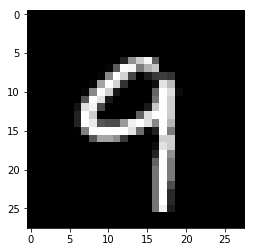

In [3]:
plt.imshow(np.reshape(mnist.train.images[8],[28,28]),cmap='gray')
plt.show()

In [4]:
#parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

In [5]:
#network parameters
n_hidden_1 = 10 # 1st hidden layer, number of neurons
n_hidden_2 = 10 # 2nd hidden layer,number of neurons
num_input = 784 # input size of 784 since image is of size 28x28 which equals 784
num_classes = 10 # total classes (0-9 digits)
 #tf graph input
X = tf.placeholder ("float",[None,num_input])
y = tf.placeholder("float",[None,num_classes])

    




In [6]:
# Store Layer weights & Bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,num_classes]))
    }
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([num_classes]))
}

In [7]:
def neural_net(x):
    #fully connected hidden layer with 10 neurons
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #fully connected hidden layer with 10 neurons
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    #fully connected output layer with a neuron for each class(0-9)
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    return out_layer

In [8]:
logits = neural_net(X)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
# Evaluate Model 
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [10]:
#Initialize the Variables
init = tf.global_variables_initializer()

In [17]:
#start training
with tf.Session() as sess:
    #run the initializer
    sess.run(init)
    
    for step in range(1,num_steps +1):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op,feed_dict = {X:batch_x,y:batch_y})
        if step %display_step  == 0 or step == 1:
            #Calculate batch loss and accuracy
            loss,acc = sess.run([loss_op,accuracy],feed_dict= {X:batch_x,y:batch_y})
            print("Step" +str(step) + ",Minibatch Loss=" "{:.4f}".format(loss) +",Training Accuracy=" "{:.3f}".format(acc))
        print("Optimization Finished!")
        print("Testing Accuracy:",sess.run(accuracy,feed_dict={X:mnist.test.images,y:mnist.test.labels}))
        
        

Step1,Minibatch Loss=116.1788,Training Accuracy=0.164
Optimization Finished!
Testing Accuracy: 0.141
Optimization Finished!
Testing Accuracy: 0.1709
Optimization Finished!
Testing Accuracy: 0.2785
Optimization Finished!
Testing Accuracy: 0.3585
Optimization Finished!
Testing Accuracy: 0.349
Optimization Finished!
Testing Accuracy: 0.3224
Optimization Finished!
Testing Accuracy: 0.3614
Optimization Finished!
Testing Accuracy: 0.4437
Optimization Finished!
Testing Accuracy: 0.5146
Optimization Finished!
Testing Accuracy: 0.4869
Optimization Finished!
Testing Accuracy: 0.5221
Optimization Finished!
Testing Accuracy: 0.59
Optimization Finished!
Testing Accuracy: 0.6097
Optimization Finished!
Testing Accuracy: 0.604
Optimization Finished!
Testing Accuracy: 0.6119
Optimization Finished!
Testing Accuracy: 0.6188
Optimization Finished!
Testing Accuracy: 0.6385
Optimization Finished!
Testing Accuracy: 0.6597
Optimization Finished!
Testing Accuracy: 0.6659
Optimization Finished!
Testing Accuracy

Testing Accuracy: 0.7953
Optimization Finished!
Testing Accuracy: 0.7944
Optimization Finished!
Testing Accuracy: 0.8014
Optimization Finished!
Testing Accuracy: 0.808
Optimization Finished!
Testing Accuracy: 0.8057
Optimization Finished!
Testing Accuracy: 0.8037
Optimization Finished!
Testing Accuracy: 0.8101
Optimization Finished!
Testing Accuracy: 0.8124
Optimization Finished!
Testing Accuracy: 0.8114
Optimization Finished!
Testing Accuracy: 0.814
Optimization Finished!
Testing Accuracy: 0.8168
Optimization Finished!
Testing Accuracy: 0.8152
Optimization Finished!
Testing Accuracy: 0.8199
Optimization Finished!
Testing Accuracy: 0.8206
Optimization Finished!
Testing Accuracy: 0.8122
Optimization Finished!
Testing Accuracy: 0.8012
Optimization Finished!
Testing Accuracy: 0.8081
Optimization Finished!
Testing Accuracy: 0.8227
Optimization Finished!
Testing Accuracy: 0.8128
Optimization Finished!
Testing Accuracy: 0.7994
Optimization Finished!
Testing Accuracy: 0.7888
Optimization Fini

Optimization Finished!
Testing Accuracy: 0.8497
Optimization Finished!
Testing Accuracy: 0.8517
Optimization Finished!
Testing Accuracy: 0.8588
Optimization Finished!
Testing Accuracy: 0.8541
Optimization Finished!
Testing Accuracy: 0.8505
Optimization Finished!
Testing Accuracy: 0.8482
Optimization Finished!
Testing Accuracy: 0.8476
Optimization Finished!
Testing Accuracy: 0.8545
Optimization Finished!
Testing Accuracy: 0.8584
Optimization Finished!
Testing Accuracy: 0.8634
Optimization Finished!
Testing Accuracy: 0.867
Optimization Finished!
Testing Accuracy: 0.8641
Optimization Finished!
Testing Accuracy: 0.8587
Optimization Finished!
Testing Accuracy: 0.863
Optimization Finished!
Testing Accuracy: 0.8624
Optimization Finished!
Testing Accuracy: 0.8554
Optimization Finished!
Testing Accuracy: 0.8435
Optimization Finished!
Testing Accuracy: 0.8328
Optimization Finished!
Testing Accuracy: 0.8332
Optimization Finished!
Testing Accuracy: 0.8508
Optimization Finished!
Testing Accuracy: 0